# Linear Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def mean(self, X):
        return sum(X) / len(X)
    
    def variance(self, X):
        return sum([(X[i] - self.mean(X))**2 for i in range(len(X))])
    
    def covariance(self, X, y):
        return sum([(X[i] - self.mean(X)) * (y[i] - self.mean(y)) for i in range(len(X))])
    
    def fit(self, X, y):
        self.b1 = self.covariance(X, y) / self.variance(X)
        self.b0 = self.mean(y) - self.b1*self.mean(X)
    
    def predict(self, X):
        return self.b0 + self.b1*X

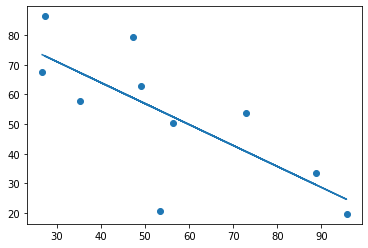

In [3]:
# make dataset
X = np.random.uniform(1, 100, 10)
y = np.random.uniform(1, 100, 10)
linreg = LinearRegression()
linreg.fit(X, y)
y_hat = linreg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show()

# Logistic Regression 

In [4]:
class LogisticRegression:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def bce_loss(self, y, y_hat):
        # binary cross entropy loss function
        m = y.shape[0]
        return -(1/m) * sum(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat) )
    
    def compute_gradients(self, x, y, y_hat):
        m = y.shape[0]
        return (1 / m) * np.dot(x.T, y_hat - y)
    
    def fit(X, y):
        max_steps = 10
        lr = .01
        cost = []
        for step in range(max_steps):
            y_hat = sigmoid()
            cost.append(bce_loss())

# K-Nearest Neighbors

In [5]:
class KNearestNeighbors:
    def __init__(self):
        pass
    
    def euclidian_distance(self, new_point, data):
        distances = [(new_point[i] - data[i])**2 for i in range(len(new_point))]
        return np.sqrt(sum(distances))
    
    def get_neighbors(self, new_point, data, k):
        distances = []
        for point in data:
            distances.append((point, euclidian_distance(new_point, point)))
        distances.sort(key=lambda tup: tup[1])
        neighbors = [distances[i][0] for i in range(k)]
        return neighbors

# Topic Modeling: Latent Semantic Analysis (LSA)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

class LSA():
    def __init__(self, docs):
        # convert documents to TF-IDF vectors
        self.TF_IDF = TfidfVectorizer()
        self.TF_IDF.fit(docs)
        vectors = self.TF_IDF.transform(docs)

        # build the LSA topic model
        self.LSA_model = TruncatedSVD()
        self.LSA_model.fit(vectors)
        return
    
    def get_features(self, new_docs):
        # get topic-based features for new documents
        new_vectors = self.TF_IDF.transform(new_docs)
        return self.LSA_model.transform(new_vectors)

In [29]:
docs = ["This is a text.", "This another one."]
LSA_featurizer = LSA(docs)

new_docs = ["This is a third text.", "This is a fourth one."]
LSA_features = LSA_featurizer.get_features(new_docs)
LSA_features

array([[7.75239670e-01, 6.31667202e-01],
       [7.75239670e-01, 2.77555756e-16]])

# Topic Modeling: Latent Dirichlet Allocation (LDA)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

class LDA():
    def __init__(self, docs):
        # convert documents to TF_IDF vectors
        self.TF = CountVectorizer()
        self.TF.fit(docs)
        vectors = self.TF.transform(docs)

        # build the LDA topic model
        self.LDA_model = LatentDirichletAllocation(n_components=50)
        self.LDA_model.fit(vectors)
        return
    
    def get_features(self, new_docs):
        # get topic-based features for new documents
        new_vectors = self.TF.transform(new_docs)
        return self.LDA_model.transform(new_vectors)

In [35]:
docs = ["This is a text.", "This another one."]
LDA_featurizer = LDA(docs)

new_docs = ["This is a third text.", "This is a fourth one."]
LDA_features = LDA_featurizer.get_features(new_docs)
LDA_features

array([[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.755,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005],
       [0.005, 0.005, 0.38 , 0.005, 0.005, 0.005, 0.005, 0.005, 0.38 ,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005]])